# Data 602 Project: Machine learning classification of Aerosol (pollutant) types

In [175]:
# Importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from mixed_naive_bayes import MixedNB
from sklearn.naive_bayes import CategoricalNB
import mlxtend
from mlxtend.plotting import plot_decision_regions
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost
from xgboost import XGBRegressor
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE,SMOTENC,SVMSMOTE
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from skopt.space import Real, Categorical, Integer
from sklearn.pipeline import make_pipeline

In [3]:
import warnings
warnings.filterwarnings('ignore')

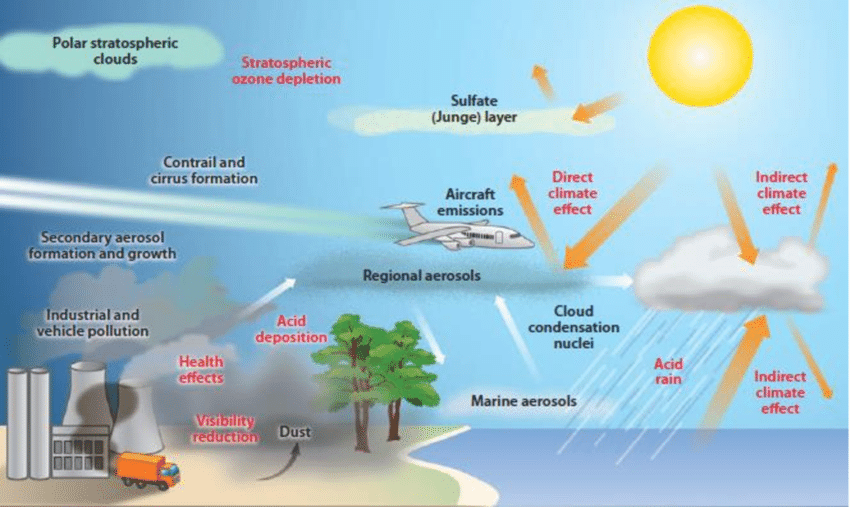

# Introduction

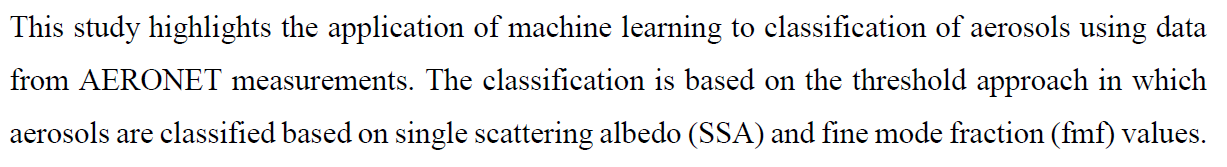

In [113]:
data1 = pd.read_csv('clean_data2.csv')
data1.head(2)

,Fine_Mode_AOD,Coarse_Mode_AOD,FineModeFraction,Angstrom_Exponent(AE),AI,AT,CO_MF,HCHO_Amount,NO2_Column,Scattering_angle,SO2_Column,SSA,Aerosol_Type
0,0.466408,0.359028,0.230269,0.083645,0.920354,0.776024,0.882637,0.985423,0.651131,0.900584,0.653226,1.000000,UN
1,0.892468,0.359028,0.208716,0.105258,0.991150,0.823236,0.621899,0.982633,0.465794,0.972743,0.629032,0.777778,DU


In [114]:
data1.columns

Index(['Fine_Mode_AOD', 'Coarse_Mode_AOD', 'FineModeFraction',
       'Angstrom_Exponent(AE)', 'AI', 'AT', 'CO_MF', 'HCHO_Amount',
       'NO2_Column', 'Scattering_angle', 'SO2_Column', 'SSA', 'Aerosol_Type'],
      dtype='object')

In [115]:
data1.shape

(1020, 13)

In [116]:
data1.describe()

,Fine_Mode_AOD,Coarse_Mode_AOD,FineModeFraction,Angstrom_Exponent(AE),AI,AT,CO_MF,HCHO_Amount,NO2_Column,Scattering_angle,SO2_Column,SSA
count,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000
mean,0.466408,0.359028,0.504802,0.560841,0.567400,0.775419,0.621899,0.980408,0.644780,0.494449,0.752532,0.699246
std,0.240860,0.263798,0.220709,0.219984,0.188316,0.207519,0.179039,0.045853,0.164492,0.285757,0.117771,0.218800
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.283365,0.108981,0.354249,0.403260,0.433628,0.736242,0.518039,0.983984,0.547561,0.256783,0.685484,0.555556
50%,0.466408,0.359028,0.504802,0.560841,0.567400,0.840596,0.621899,0.985375,0.644780,0.494449,0.752532,0.699246
75%,0.629072,0.545153,0.641160,0.721542,0.703540,0.921173,0.717512,0.986724,0.754702,0.770186,0.814516,0.888889
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


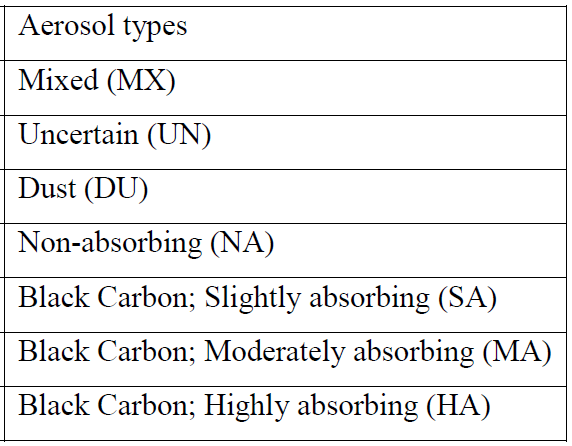

In [117]:
#Let's see the target classes and counts
data1['Aerosol_Type'].value_counts()

MX     333
DU     262
SA     178
UN     132
NAs     81
MA      34
Name: Aerosol_Type, dtype: int64

**The data collected from this site has only 6 of the seven aerosol types. Data will be supplied for other sites later.**

<AxesSubplot:xlabel='Aerosol_Type', ylabel='count'>

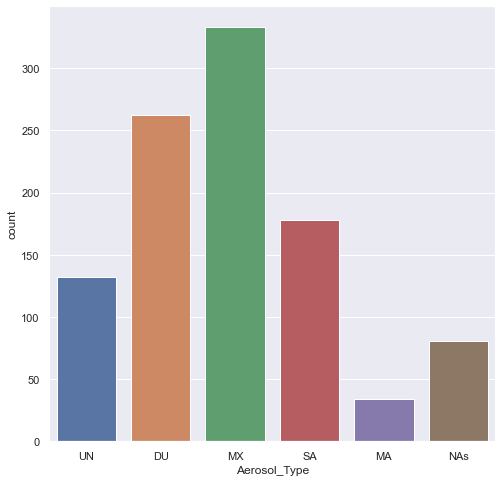

In [118]:
#Lets visualize the Target
sns.set(rc={'figure.figsize':(8,8)})
sns.countplot(x='Aerosol_Type', data =data1)

In [119]:
data1['Aerosol_Type'].replace(['SA', 'NAs', 'MX', 'MA', 'UN', 'DU'], [0, 1, 2, 3, 4, 5], inplace=True)
#data1['Aerosol_Type'].replace(['SA', 'MX', 'UN', 'DU'], [0, 1, 2, 3], inplace=True)

In [120]:
#Let's see the target classes and counts
data1['Aerosol_Type'].value_counts()

2    333
5    262
0    178
4    132
1     81
3     34
Name: Aerosol_Type, dtype: int64

<AxesSubplot:>

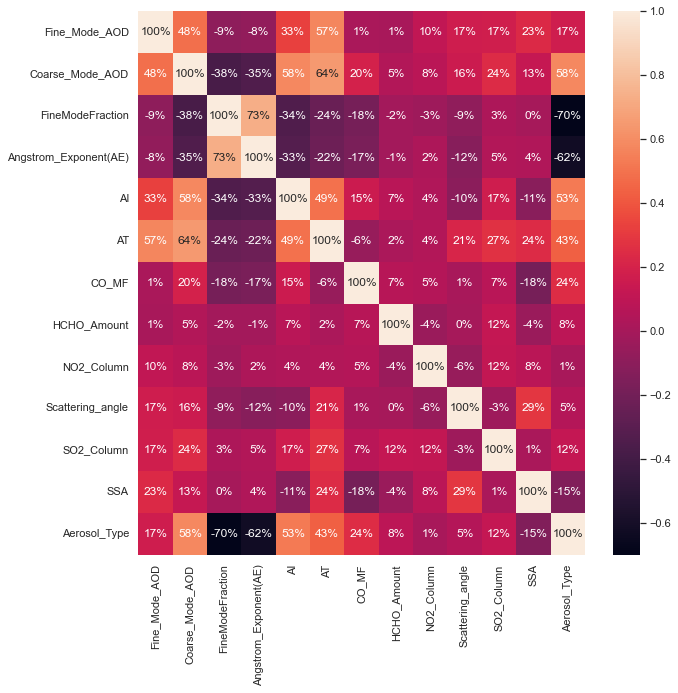

In [82]:
#Let's visualize the correlation of the features
plt.figure(figsize=(10,10))
sns.heatmap(data1.corr(), annot=True, fmt='.0%')

# In view of the multicollinearity, let's do some feature engineering

In [83]:
#data1['Total_AOD'] = data1['Fine_Mode_AOD'] + data1['Coarse_Mode_AOD']

In [121]:
#data1.drop(['Fine_Mode_AOD', 'Coarse_Mode_AOD', 'FineModeFraction'] , axis = 1, inplace=True)
data1.drop(['FineModeFraction', 'SSA'] , axis = 1, inplace=True)

#Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
Prom_col = list(data1.columns)
Prom_col.remove('Aerosol_Type')
for col in Prom_col:
    data1[col] = data1[col].astype(float)
    data1[[col]] = scaler.fit_transform(data1[[col]])
#prom_train['Promoted_or_Not'] = pd.to_numeric(prom_train['Promoted_or_Not'], downcast='float') 
data1.head(3)

<AxesSubplot:>

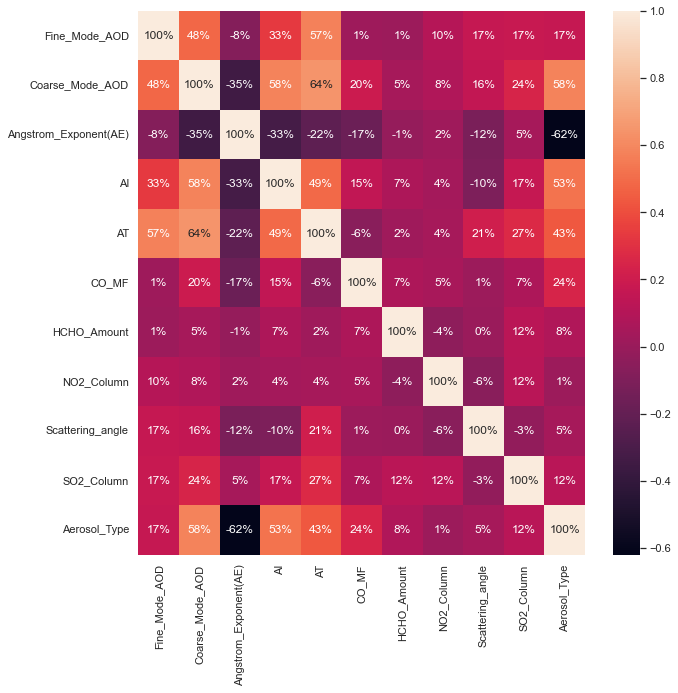

In [85]:
#Let's visualize the correlation of the features
plt.figure(figsize=(10,10))
sns.heatmap(data1.corr(), annot=True, fmt='.0%')

In [86]:
data1.shape

(1020, 11)

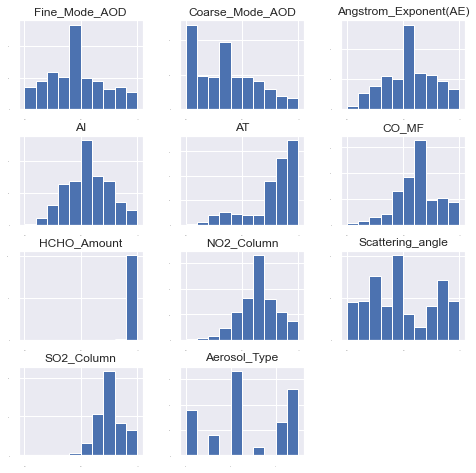

In [87]:
# histograms
data1.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.show()

In [122]:
X = data1.iloc[:,0:10]  #independent columns
y = data1.iloc[:,10]    #target column 

In [123]:
# Breaking the data into train and test subsets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=3)

In [124]:
# Constructing a random forest classifier

rf_clf = RandomForestClassifier(max_depth=2, random_state=3)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=3)

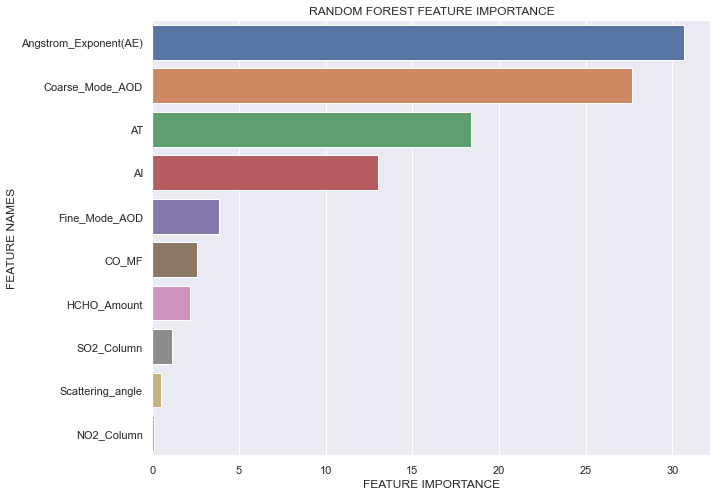

In [91]:
def plot_feature_importance(importance,names,model_type):
    

    #Create arrays from feature importance and feature names
    importance = 100.0*(importance/np.sum(importance))
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

plot_feature_importance(rf_clf.feature_importances_,X_train.columns,'RANDOM FOREST')

In [125]:
# Defining the 10 features and the target of the model

X1 = data1[['Fine_Mode_AOD', 'Coarse_Mode_AOD', 'Angstrom_Exponent(AE)', 'AI', 'AT', 'CO_MF', 'HCHO_Amount', 'NO2_Column', 'Scattering_angle', 'SO2_Column']].to_numpy()     # Features
y1 = data1['Aerosol_Type'].to_numpy()                    # Target 

# Defining 7 features and the target of the model

X1 = data1[['Fine_Mode_AOD', 'Coarse_Mode_AOD', 'Angstrom_Exponent(AE)', 'AI', 'AT', 'CO_MF', 'HCHO_Amount']].to_numpy()     # Features
y1 = data1['Aerosol_Type'].to_numpy() 

# Defining 4 features and the target of the model

X1 = data1[['Coarse_Mode_AOD', 'Angstrom_Exponent(AE)', 'AI', 'AT']].to_numpy()     # Features
y1 = data1['Aerosol_Type'].to_numpy() 

In [126]:
# Encoding categorical data
labelencoder_X_1 = LabelEncoder()
y1 = labelencoder_X_1.fit_transform(y1)

In [24]:
#X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.25,random_state=3)

# SMOTE Analysis for highly imbalaced class Balancing

In [127]:
smote = SMOTE('auto',random_state=42)
X2,y2 = smote.fit_resample(X1,y1)
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.20,random_state=3)

In [188]:
#Let's see the target classes and counts
balancedy = pd.DataFrame(y2, columns = ['y'])
balancedy.value_counts()

y
0    333
1    333
2    333
3    333
4    333
5    333
dtype: int64

<AxesSubplot:xlabel='y', ylabel='count'>

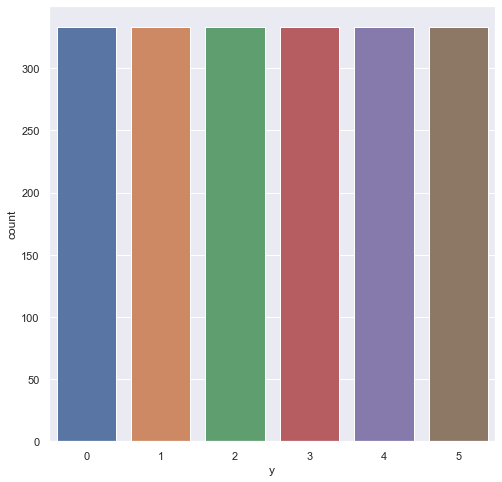

In [189]:
#Lets visualize the Target
sns.set(rc={'figure.figsize':(8,8)})
sns.countplot(x= 'y', data = balancedy)

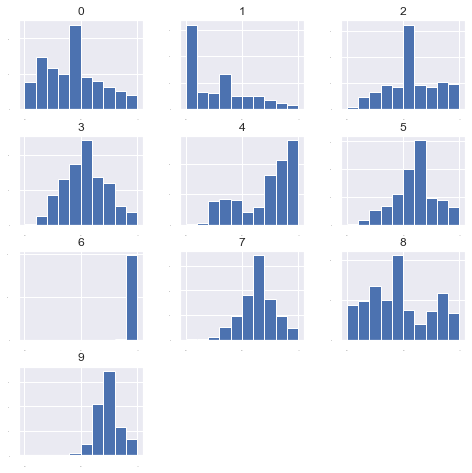

In [190]:
# histograms
balancedx = pd.DataFrame(X2)
balancedx.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.show()

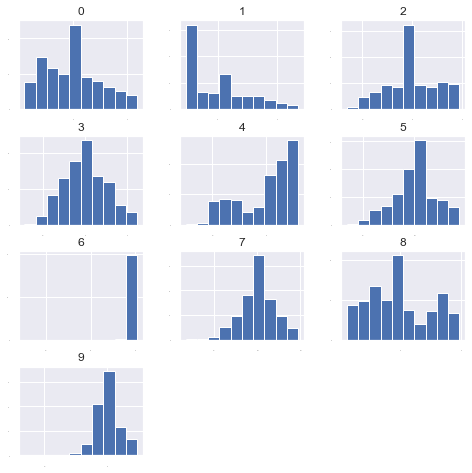

In [191]:
sc = StandardScaler()
standardX = sc.fit_transform(X2)
standardizedX = pd.DataFrame(standardX)
standardizedX.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.show()

In [26]:
#np.unique(y_train, return_counts=True)
#np.unique(y_test, return_counts=True)

# Train data: [0, 1, 2, 3, 4, 5] ==> [252, 245, 253, 260, 251, 237]

# Test data: [0, 1, 2, 3, 4, 5] ==> [81, 88, 80, 73, 82, 96]

In [27]:
#Feature Scaling
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

In [128]:
# Test options and evaluation metric
num_folds = 5
seed = 7
scoring = 'accuracy'

In [129]:
# selection of algorithms to consider and set performance measure
models = []
models.append(('Logistic Regression', LogisticRegression(random_state=7,
                                                         class_weight='balanced')))
#models.append(('Random Forest', RandomForestClassifier(
#    n_estimators=100, random_state=7)))
models.append(('SVM', svm.SVC(gamma='auto', random_state=7)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(random_state=7)))
models.append(('Gaussian NB', GaussianNB()))

In [130]:
acc_results = []
names = []
col = ['Algorithm', 
       'Accuracy Mean', 'Accuracy STD']
df_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using cross-validation
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=5)  # 5-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    acc_results.append(cv_acc_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
    
df_results.sort_values(by=['Accuracy Mean'], ascending=False)

,Algorithm,Accuracy Mean,Accuracy STD
3,KNN,75.47,1.99
2,CART,71.97,1.92
4,Decision Tree Classifier,71.90,1.97
0,Logistic Regression,61.33,2.47
1,SVM,57.95,2.34
5,Gaussian NB,51.31,3.69


# Standardized data and create pipeline

In [131]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA',
LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',
GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', svm.SVC())])))
results = []
names = []
col = ['Algorithm', 
       'Accuracy Mean', 'Accuracy STD']
df_results = pd.DataFrame(columns=col)
i = 0

# evaluate each model using cross-validation
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_results.mean()*100, 2),
                         round(cv_results.std()*100, 2)
                         ]
    i += 1
df_results.sort_values(by=['Accuracy Mean'], ascending=False)

,Algorithm,Accuracy Mean,Accuracy STD
2,ScaledKNN,74.28,2.97
5,ScaledSVM,73.40,2.27
3,ScaledCART,72.40,2.35
0,ScaledLR,64.20,1.68
1,ScaledLDA,57.44,3.11
4,ScaledNB,51.31,3.69


# Tuning SVM

In [109]:
# Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = {'C': [0.01, 0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'gamma':['scale', 'auto'],
              'kernel': ['linear', 'rbf', 'poly'],
              'degree': [2, 3],
              'coef0': [0, 1, 2]}
#param_grid = dict(C=c_values, kernel=kernel_values)
model = svm.SVC(decision_function_shape='ovo')
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold, refit = True, verbose = 3, n_jobs=-1)
grid_result = grid.fit(rescaledX, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
#means = grid_result.cv_results_['mean_test_score']
#stds = grid_result.cv_results_['std_test_score']
#params = grid_result.cv_results_['params']
#for mean, stdev, param in zip(means, stds, params):
#    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best: 0.822298 using {'C': 100, 'coef0': 0, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}


# Tuning KNN

In [110]:
# Tune scaled KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
leaf_size = list(range(1,50))
neighbors = list(range(1,30))
p=[1,2]
weights = ['uniform','distance']
metric = ['minkowski','euclidean','manhattan']
param_grid = dict(n_neighbors=neighbors, leaf_size=leaf_size, p=p, weights=weights, metric=metric)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
#means = grid_result.cv_results_['mean_test_score']
#stds = grid_result.cv_results_['std_test_score']
#params = grid_result.cv_results_['params']
#for mean, stdev, param in zip(means, stds, params):
#    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.820417 using {'leaf_size': 1, 'metric': 'minkowski', 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}


In [ ]:
kernel='poly', gamma='scale', C=100, coef0=1, degree=3, decision_function_shape='ovo'

# Optimized models (SVC and KNN)

In [132]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsClassifier(leaf_size=1, metric= 'minkowski', n_neighbors= 1, p= 1, weights= 'uniform'))])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', 
svm.SVC(kernel='rbf', gamma='scale', C=100, coef0=0, degree=2, decision_function_shape='ovo'))])))
results = []
names = []
col = ['Algorithm', 
       'Accuracy Mean', 'Accuracy STD']
df_results = pd.DataFrame(columns=col)
i = 0

# evaluate each model using cross-validation
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_results.mean()*100, 2),
                         round(cv_results.std()*100, 2)
                         ]
    i += 1
df_results.sort_values(by=['Accuracy Mean'], ascending=False)

,Algorithm,Accuracy Mean,Accuracy STD
1,ScaledSVM,82.17,1.91
0,ScaledKNN,82.04,2.18


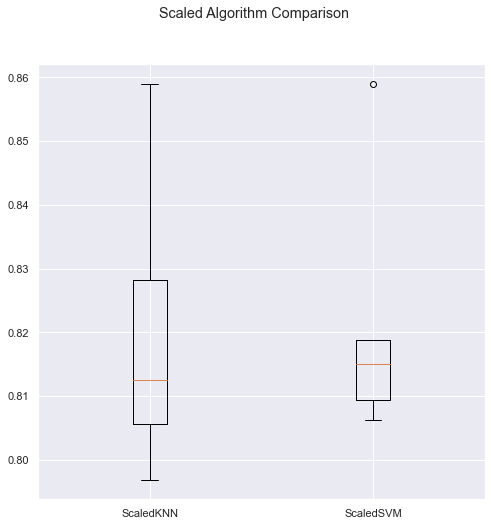

In [136]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# SVM on Test data

Test accuracy score of the model is  0.8475


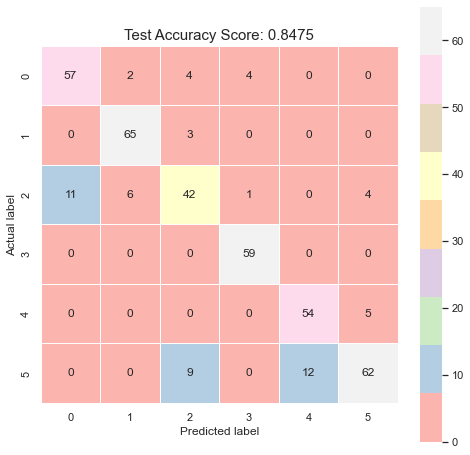

Test Classification Report: 

               precision    recall  f1-score   support

           0       0.84      0.85      0.84        67
           1       0.89      0.96      0.92        68
           2       0.72      0.66      0.69        64
           3       0.92      1.00      0.96        59
           4       0.82      0.92      0.86        59
           5       0.87      0.75      0.81        83

    accuracy                           0.85       400
   macro avg       0.84      0.85      0.85       400
weighted avg       0.85      0.85      0.84       400



In [134]:
# Instantiating the tuned SVM classifier

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

rbf_svc = svm.SVC(kernel='rbf', gamma='scale', C=100, coef0=0, degree=2, decision_function_shape='ovo')  

rbf_svc.fit(X_train, y_train)    # Fitting the training data to the classifier

y_pred = rbf_svc.predict(X_test)   # Calculate the predictions of the model for the test subset

score = metrics.accuracy_score(y_test, y_pred)

print('Test accuracy score of the model is ', round(score, 5))

# Computing the confusion matrix

test_svc_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,8))
sns.heatmap(test_svc_matrix, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Test Accuracy Score: {0}'.format(round(score, 4))
plt.title(all_sample_title, size = 15);
plt.show()

print('Test Classification Report: \n\n', classification_report(y_test, y_pred))

# KNN on test data

Test accuracy score of the model is  0.8575


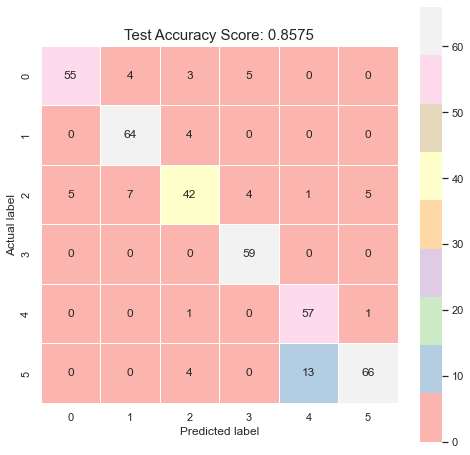

Test Classification Report: 

               precision    recall  f1-score   support

           0       0.92      0.82      0.87        67
           1       0.85      0.94      0.90        68
           2       0.78      0.66      0.71        64
           3       0.87      1.00      0.93        59
           4       0.80      0.97      0.88        59
           5       0.92      0.80      0.85        83

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.85       400



In [135]:
# Instantiating the tuned SVM classifier

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

knn = KNeighborsClassifier(leaf_size=1, metric= 'minkowski', n_neighbors= 1, p= 1, weights= 'uniform') 

knn.fit(X_train, y_train)    # Fitting the training data to the classifier

y_pred = knn.predict(X_test)   # Calculate the predictions of the model for the test subset

score = metrics.accuracy_score(y_test, y_pred)

print('Test accuracy score of the model is ', round(score, 5))

# Computing the confusion matrix

test_svc_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,8))
sns.heatmap(test_svc_matrix, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Test Accuracy Score: {0}'.format(round(score, 4))
plt.title(all_sample_title, size = 15);
plt.show()

print('Test Classification Report: \n\n', classification_report(y_test, y_pred))

# ENSEMBLE MODELS

In [139]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB',
AdaBoostClassifier())])))
pipelines.append(('ScaledLGBM', Pipeline([('Scaler', StandardScaler()),('GBM',
GradientBoostingClassifier())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',
RandomForestClassifier())])))
pipelines.append(('ScaledXGB', Pipeline([('Scaler', StandardScaler()),('XGB',
XGBClassifier())])))
pipelines.append(('ScaledCAT', Pipeline([('Scaler', StandardScaler()),('CAT',
CatBoostClassifier(verbose=False))])))
pipelines.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET',
ExtraTreesClassifier())])))
results = []
names = []
col = ['Algorithm', 
       'Accuracy Mean', 'Accuracy STD']
df_results = pd.DataFrame(columns=col)
i = 0

# evaluate each model using cross-validation
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_results.mean()*100, 2),
                         round(cv_results.std()*100, 2)
                         ]
    i += 1
df_results.sort_values(by=['Accuracy Mean'], ascending=False)

,Algorithm,Accuracy Mean,Accuracy STD
5,ScaledET,85.80,1.97
4,ScaledCAT,84.04,1.57
2,ScaledRF,82.73,1.44
3,ScaledXGB,82.42,1.42
1,ScaledLGBM,78.10,1.51
0,ScaledAB,46.43,3.44


# Tuning Extratree Classifier

In [142]:
# Tune scaled ET
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = {'criterion': ['gini', 'entropy'],
              'n_estimators': [50, 100, 200],
              'max_features': [0.1, 0.3, 0.5, 'sqrt', 'log'],
              'max_depth': [1, 3, 5, 10, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 5, 10]}
model = ExtraTreesClassifier()
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold, refit = True, verbose = 3, n_jobs=-1)
grid_result = grid.fit(rescaledX, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 1800 candidates, totalling 9000 fits
Best: 0.869845 using {'criterion': 'gini', 'max_depth': None, 'max_features': 0.3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


# Tuning Random Forest Classifier

In [164]:
# Tune scaled RF
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = { 
    'n_estimators': [600, 650],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [10, 11, 12, 13, 14, 15],
    'criterion' :['gini', 'entropy']
}
model = RandomForestClassifier()
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold, refit = True, verbose = False, n_jobs=-1)
grid_result = grid.fit(rescaledX, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.841054 using {'criterion': 'entropy', 'max_depth': 12, 'max_features': 'sqrt', 'n_estimators': 600}


# Optimized Ensemble Models

In [169]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',
RandomForestClassifier(criterion= 'entropy', max_depth= 12, max_features ='sqrt', n_estimators= 600))])))
pipelines.append(('ScaledCAT', Pipeline([('Scaler', StandardScaler()),('CAT',
CatBoostClassifier(bootstrap_type="Bernoulli",class_weights=[1, 1, 1,1,1,1],loss_function='MultiClass', verbose= False, random_seed= 63, iterations= 1000, learning_rate= 0.03, l2_leaf_reg=3,random_strength=1,leaf_estimation_method='Newton',depth= 6))])))
pipelines.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET',
ExtraTreesClassifier(criterion='gini', max_depth=None, max_features= 0.3, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 200))])))
results = []
names = []
col = ['Algorithm', 
       'Accuracy Mean', 'Accuracy STD']
df_results = pd.DataFrame(columns=col)
i = 0

# evaluate each model using cross-validation
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_results.mean()*100, 2),
                         round(cv_results.std()*100, 2)
                         ]
    i += 1
df_results.sort_values(by=['Accuracy Mean'], ascending=False)

,Algorithm,Accuracy Mean,Accuracy STD
2,ScaledET,85.92,1.75
0,ScaledRF,84.17,1.63
1,ScaledCAT,83.42,1.59


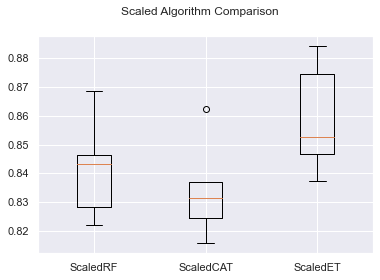

In [170]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Random forest model on test data

Test accuracy score of the model is  0.8575


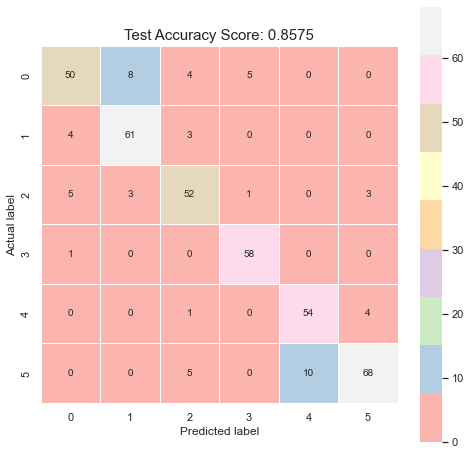

Test Classification Report: 

               precision    recall  f1-score   support

           0       0.83      0.75      0.79        67
           1       0.85      0.90      0.87        68
           2       0.80      0.81      0.81        64
           3       0.91      0.98      0.94        59
           4       0.84      0.92      0.88        59
           5       0.91      0.82      0.86        83

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400



In [171]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

rf = RandomForestClassifier(criterion= 'entropy', max_depth= 12, max_features ='sqrt', n_estimators= 600)  

rf.fit(X_train, y_train)    # Fitting the training data to the classifier

y_pred = rf.predict(X_test)   # Calculate the predictions of the model for the test subset

score = metrics.accuracy_score(y_test, y_pred)

print('Test accuracy score of the model is ', round(score, 5))

# Computing the confusion matrix

test_svc_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,8))
sns.heatmap(test_svc_matrix, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Test Accuracy Score: {0}'.format(round(score, 4))
plt.title(all_sample_title, size = 15);
plt.show()

print('Test Classification Report: \n\n', classification_report(y_test, y_pred))

# Catboost on test data

Test accuracy score of the model is  0.85


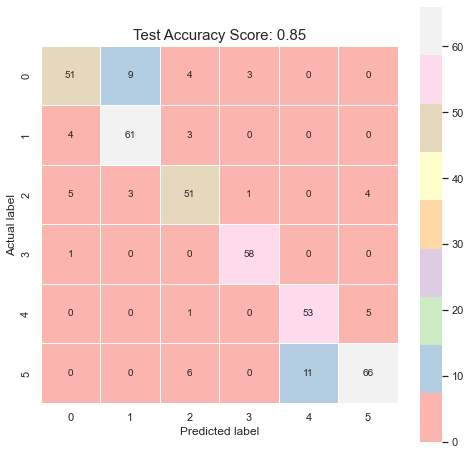

Test Classification Report: 

               precision    recall  f1-score   support

           0       0.84      0.76      0.80        67
           1       0.84      0.90      0.87        68
           2       0.78      0.80      0.79        64
           3       0.94      0.98      0.96        59
           4       0.83      0.90      0.86        59
           5       0.88      0.80      0.84        83

    accuracy                           0.85       400
   macro avg       0.85      0.86      0.85       400
weighted avg       0.85      0.85      0.85       400



In [172]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

cb = CatBoostClassifier(bootstrap_type="Bernoulli",class_weights=[1, 1, 1,1,1,1],loss_function='MultiClass', verbose= False, random_seed= 63, iterations= 1000, learning_rate= 0.03, l2_leaf_reg=3,random_strength=1,leaf_estimation_method='Newton',depth= 6) 

cb.fit(X_train, y_train)    # Fitting the training data to the classifier

y_pred = cb.predict(X_test)   # Calculate the predictions of the model for the test subset

score = metrics.accuracy_score(y_test, y_pred)

print('Test accuracy score of the model is ', round(score, 5))

# Computing the confusion matrix

test_svc_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,8))
sns.heatmap(test_svc_matrix, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Test Accuracy Score: {0}'.format(round(score, 4))
plt.title(all_sample_title, size = 15);
plt.show()

print('Test Classification Report: \n\n', classification_report(y_test, y_pred))

# Extratree on test data

Test accuracy score of the model is  0.8775


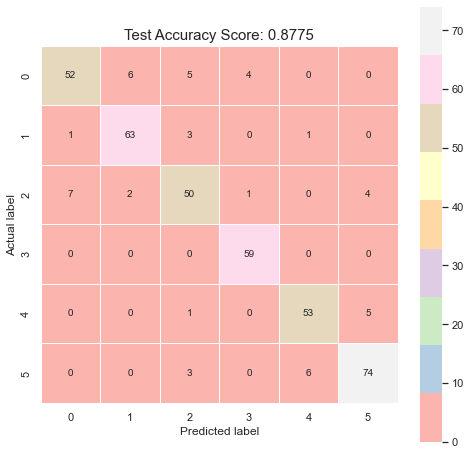

Test Classification Report: 

               precision    recall  f1-score   support

           0       0.87      0.78      0.82        67
           1       0.89      0.93      0.91        68
           2       0.81      0.78      0.79        64
           3       0.92      1.00      0.96        59
           4       0.88      0.90      0.89        59
           5       0.89      0.89      0.89        83

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



In [173]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

et = ExtraTreesClassifier(criterion='gini', max_depth=None, max_features= 0.3, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 200)

et.fit(X_train, y_train)    # Fitting the training data to the classifier

y_pred = et.predict(X_test)   # Calculate the predictions of the model for the test subset

score = metrics.accuracy_score(y_test, y_pred)

print('Test accuracy score of the model is ', round(score, 5))

# Computing the confusion matrix

test_svc_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,8))
sns.heatmap(test_svc_matrix, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Test Accuracy Score: {0}'.format(round(score, 4))
plt.title(all_sample_title, size = 15);
plt.show()

print('Test Classification Report: \n\n', classification_report(y_test, y_pred))

# Stacked Model

Test accuracy score of the model is  0.8775


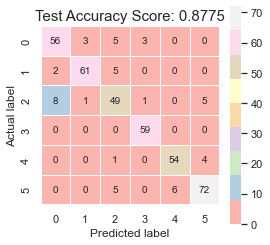

Test Classification Report: 

               precision    recall  f1-score   support

           0       0.85      0.84      0.84        67
           1       0.94      0.90      0.92        68
           2       0.75      0.77      0.76        64
           3       0.94      1.00      0.97        59
           4       0.90      0.92      0.91        59
           5       0.89      0.87      0.88        83

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



In [179]:
estimators = [('rf', RandomForestClassifier(criterion= 'entropy', max_depth= 12, max_features ='sqrt', n_estimators= 600)), ('cb', CatBoostClassifier(bootstrap_type="Bernoulli",class_weights=[1, 1, 1,1,1,1],loss_function='MultiClass', verbose= False, random_seed= 63, iterations= 1000, learning_rate= 0.03, l2_leaf_reg=3,random_strength=1,leaf_estimation_method='Newton',depth= 6)), ('et', make_pipeline(StandardScaler(),ExtraTreesClassifier(criterion='gini', max_depth=None, max_features= 0.3, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 200)))]


stk_clf = StackingClassifier(estimators=estimators, final_estimator=svm.SVC(kernel='rbf', gamma='scale', C=100, coef0=0, degree=2, decision_function_shape='ovo'))
stk_clf.fit(X_train, y_train)                  # Fitting the data



y_pred = stk_clf.predict(X_test)   # Calculate the predictions of the model for the test subset

score = metrics.accuracy_score(y_test, y_pred)

print('Test accuracy score of the model is ', round(score, 5))

# Computing the confusion matrix

#y_train_pred = stk_clf.predict(X_train)
#train_stk_matrix = confusion_matrix(y_train, y_train_pred)
test_stk_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(4,4))
sns.heatmap(test_stk_matrix, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Test Accuracy Score: {0}'.format(round(score, 4))
plt.title(all_sample_title, size = 15);
plt.show()

#print('Train Classification Report: \n\n', classification_report(y_train, y_train_pred))
print('Test Classification Report: \n\n', classification_report(y_test, y_pred))